<a href="https://colab.research.google.com/github/suubkiim/Pytorch-practice/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [5/60], Loss: 2.2331
Epoch [10/60], Loss: 1.0052
Epoch [15/60], Loss: 0.5077
Epoch [20/60], Loss: 0.3062
Epoch [25/60], Loss: 0.2245
Epoch [30/60], Loss: 0.1914
Epoch [35/60], Loss: 0.1780
Epoch [40/60], Loss: 0.1726
Epoch [45/60], Loss: 0.1704
Epoch [50/60], Loss: 0.1695
Epoch [55/60], Loss: 0.1692
Epoch [60/60], Loss: 0.1690


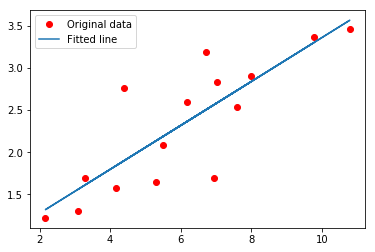

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)  #(예측값, 실제값)
    
    # Backward and optimize
    optimizer.zero_grad()
    #optimizer.zero_grad() 를 사용하여 수동으로 변화도 버퍼를 0으로 설정하는 것에 유의하세요. 이는 역전파(Backprop) 섹션에서 설명한 것처럼 변화도가 누적되기 때문입니다.
    loss.backward()

    # autograde를 사용하여 역전파 단계를 계산합니다. 이는 requires_grad=True를
    # 갖는 모든 Variable에 대한 손실의 변화도를 계산합니다. 이후 w1.grad와 w2.grad는
    # w1과 w2 각각에 대한 손실의 변화도를 갖는 Variable이 됩니다.

    optimizer.step()
     # step()이란 함수를 실행시키면 우리가 미리 선언할 때 
     # 지정해 준 model의 파라미터들이 업데이트 된다.
              
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

[손실 함수 설명 부분 참고](https://tutorials.pytorch.kr/beginner/blitz/neural_networks_tutorial.html)